<a href="https://colab.research.google.com/github/dayaleroro/Anal-ticaDescriptivaI/blob/main/Analitica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Importación de Librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset de información para explorar
df = pd.read_csv("Comportamiento_del_tr_mite_de_expedici_n_de_visa_colombiana_a_nacionales_de_Venezuela_20250224.csv")


<ipython-input-54-5d0a3d9d8467>:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Comportamiento_del_tr_mite_de_expedici_n_de_visa_colombiana_a_nacionales_de_Venezuela_20250224.csv")


In [58]:
# Visualización Inicial del Dataset
## Muestra las primeras filas del dataset para tener una idea inicial de su estructura
df.head(5)


,Tipo de visa,Actividad de la visa,País de nacimiento,Sexo,Edad,Tiene Hijos,Nivel académico,Area conocimiento,Subarea conocimiento,Ciudad domicilio Colombia,Ciudad domicilio Colombia Código,Departamento domicilio Colombia,Actividad en Colombia,Ocupación en Colombia,Sector de actividad en Colombia,Tiene familiares residentes en Colombia,Año Expedición,Mes expedición,Numero
0,NEGOCIOS,NE-1,ARGENTINA,M,49,NO,(NO REGISTRA),(NO REGISTRA),(NO REGISTRA),CUCUTA,54001,NORTE DE SANTANDER,NO INDICA,NO REGISTRA,NO INDICA,NO,2014,1,1
1,NEGOCIOS,NE-1,ARGENTINA,M,52,NO,POSTGRADO - MAESTRIA,CIENCIAS DE LA SALUD,MEDICINA,BARRANQUILLA,8001,ATLANTICO,NO INDICA,NO REGISTRA,SERVICIOS,NO,2017,3,1
2,VISAS MIGRANTE,C�NYUGE DE NACIONALIDAD COLOMBIANO(A),VENEZUELA,M,69,NO,SIN PROFESI�N,NINGUNA,NINGUNA,ARMENIA,63001,QUINDIO,TRABAJO,NO REGISTRA,SERVICIOS,NO,2023,10,1
3,NEGOCIOS,NE-1,CHILE,M,62,NO,(NO REGISTRA),(NO REGISTRA),(NO REGISTRA),CUCUTA,54001,NORTE DE SANTANDER,NO INDICA,INGENIERO CIVIL,NO INDICA,NO,2014,2,1
4,VISAS MIGRANTE,TRABAJADOR,VENEZUELA,M,18,NO,SIN PROFESI�N,NINGUNA,NINGUNA,BOGOTA D.C.,11001,CUNDINAMARCA,NO INDICA,HOGAR,NO INDICA,NO,2023,10,1


In [59]:
# Obtén el número de filas y columnas del dataset

print("\nNúmero de filas y columnas:", df.shape)


Número de filas y columnas: (133970, 19)


In [60]:
# Obtén información sobre los tipos de datos y la presencia de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133970 entries, 0 to 133969
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Tipo de visa                             133970 non-null  object
 1   Actividad de la visa                     133970 non-null  object
 2   País de nacimiento                       133970 non-null  object
 3   Sexo                                     133970 non-null  object
 4   Edad                                     133970 non-null  object
 5   Tiene Hijos                              133970 non-null  object
 6   Nivel académico                          133970 non-null  object
 7   Area conocimiento                        133970 non-null  object
 8   Subarea conocimiento                     133970 non-null  object
 9   Ciudad domicilio Colombia                133970 non-null  object
 10  Ciudad domicilio Colombia Código         133

In [24]:
print(df.isnull().sum())

Tipo de visa                                0
Actividad de la visa                        0
País de nacimiento                          0
Sexo                                        0
Edad                                        0
Tiene Hijos                                 0
Nivel académico                             0
Area conocimiento                           0
Subarea conocimiento                        0
Ciudad domicilio Colombia                   0
Ciudad domicilio Colombia Código            0
Departamento domicilio Colombia             0
Actividad en Colombia                       0
Ocupación en Colombia                      12
Sector de actividad en Colombia             0
Tiene familiares residentes en Colombia     0
Año Expedición                              0
Mes expedición                              0
Numero                                      0
dtype: int64


In [25]:
# Genera estadísticas descriptivas para las variables numéricas
print(df.describe())

       Ciudad domicilio Colombia Código  Año Expedición  Mes expedición  \
count                     133970.000000   133970.000000   133970.000000   
mean                       13375.625371     2018.263559        6.702919   
std                        21510.898343        3.090205        3.422807   
min                            0.000000     2013.000000        1.000000   
25%                            0.000000     2016.000000        4.000000   
50%                         5266.000000     2018.000000        7.000000   
75%                        11001.000000     2021.000000       10.000000   
max                        99001.000000     2025.000000       12.000000   

              Numero  
count  133970.000000  
mean        1.028200  
std         0.219139  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max        15.000000  


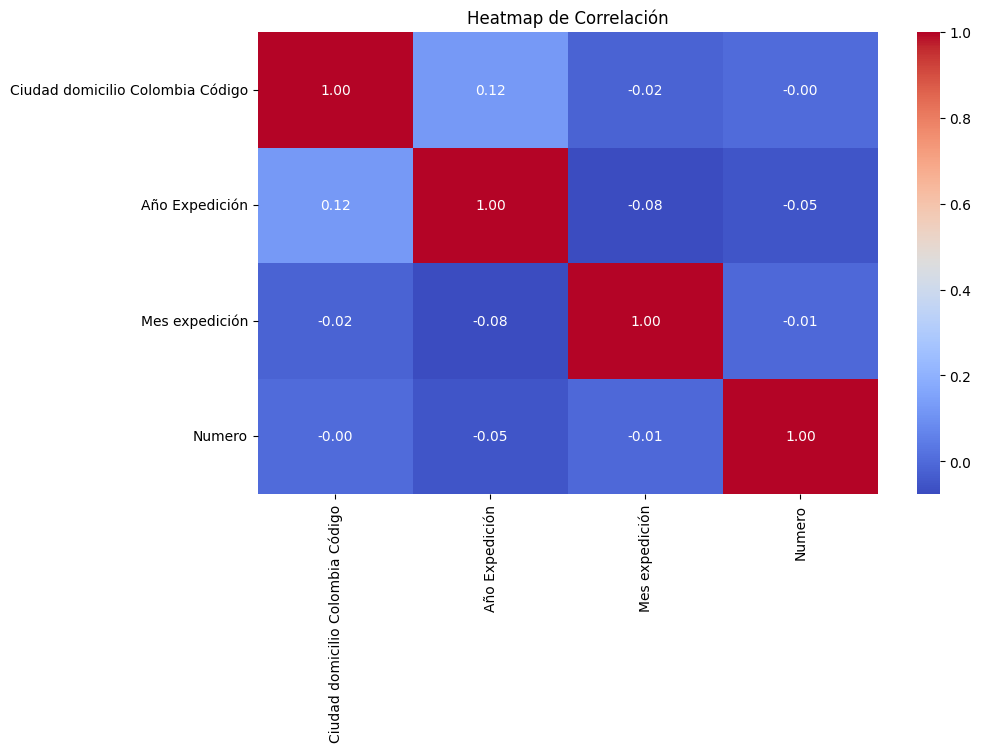

In [26]:
# Seleccionar solo columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=[np.number])

# Diagrama de correlación
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Heatmap de Correlación")
    plt.show()
else:
    print("No hay columnas numéricas para generar un heatmap de correlación.")

In [63]:
df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")
df = df.dropna(subset=["Edad"])

# Estimadores centrales para Edad y Número
if "Edad" in df.columns:
    print("\nMedidas de Edad:")
    print("Media:", df["Edad"].mean())
    print("Mediana:", df["Edad"].median())
    print("Moda:", df["Edad"].mode()[0])
    print("Desviación estándar:", df["Edad"].std())

if "Numero" in df.columns:
    print("\nMedidas de Número:")
    print("Media:", df["Numero"].mean())
    print("Mediana:", df["Numero"].median())
    print("Moda:", df["Numero"].mode()[0])



Medidas de Edad:
Media: 37.026319914605835
Mediana: 36.0
Moda: 33.0
Desviación estándar: 14.8558373010505

Medidas de Número:
Media: 1.028200974866945
Mediana: 1.0
Moda: 1


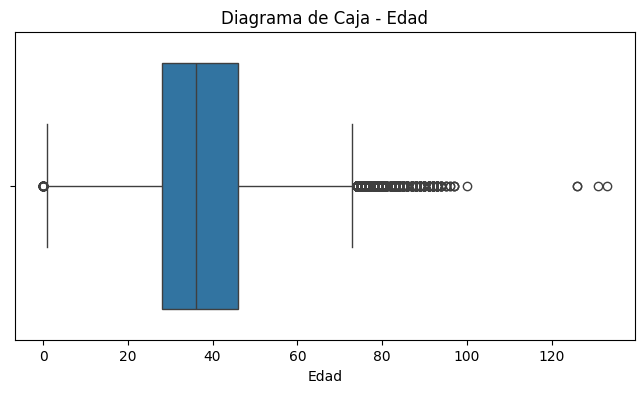

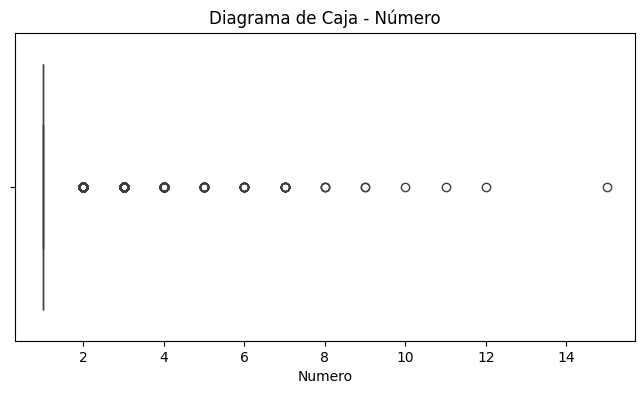

In [64]:
# Diagramas de Caja
if "Edad" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df["Edad"])
    plt.title("Diagrama de Caja - Edad")
    plt.show()

if "Numero" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df["Numero"])
    plt.title("Diagrama de Caja - Número")
    plt.show()


In [65]:
# Frecuencias de variables cualitativas
for col in ["Sexo", "Tipo de visa", "Nivel académico"]:
    if col in df.columns:
        print(f"\nFrecuencia de {col}:")
        print(df[col].value_counts(normalize=True))



Frecuencia de Sexo:
Sexo
M     0.530982
F     0.469004
NB    0.000015
Name: proportion, dtype: float64

Frecuencia de Tipo de visa:
Tipo de visa
TEMPORAL           0.345652
VISAS MIGRANTE     0.287869
VISAS RESIDENTE    0.238141
TRASPASOS          0.072137
VISAS VISITANTE    0.048825
NEGOCIOS           0.007375
Name: proportion, dtype: float64

Frecuencia de Nivel académico:
Nivel académico
PREGRADO - PROFESIONAL            0.402263
SIN PROFESI�N                     0.288616
PREGRADO - T�CNICO PROFESIONAL    0.083349
(NO REGISTRA)                     0.071376
POSTGRADO - ESPECIALIZACI�N       0.052998
PREGRADO - TECNOL�GICO            0.044197
POSTGRADO - MAESTRIA              0.043346
POSTGRADO - DOCTORADO             0.013421
BACHILLERATO                      0.000306
PRIMARIA                          0.000127
Name: proportion, dtype: float64


In [66]:
print("\nModa de Sexo:")
print("Moda:", df["Sexo"].mode()[0])

print("\nModa de Tipo de visa:")
print("Moda:", df["Tipo de visa"].mode()[0])

print("\nModa de Nivel académico:")
print("Moda:", df["Nivel académico"].mode()[0])


Moda de Sexo:
Moda: M

Moda de Tipo de visa:
Moda: TEMPORAL

Moda de Nivel académico:
Moda: PREGRADO - PROFESIONAL


In [67]:
# Tablas de contingencia
if "Tipo de visa" in df.columns and "Nivel académico" in df.columns:
    tabla_tipo_visa_nivel = pd.crosstab(df["Tipo de visa"], df["Nivel académico"])
    print("\nTabla de contingencia Tipo de visa vs. Nivel académico:")
    print(tabla_tipo_visa_nivel)

if "Sexo" in df.columns and "Tipo de visa" in df.columns:
    tabla_sexo_tipo_visa = pd.crosstab(df["Sexo"], df["Tipo de visa"])
    print("\nTabla de contingencia Sexo vs. Tipo de visa:")
    print(tabla_sexo_tipo_visa)



Tabla de contingencia Tipo de visa vs. Nivel académico:
Nivel académico  (NO REGISTRA)  BACHILLERATO  POSTGRADO - DOCTORADO  \
Tipo de visa                                                          
NEGOCIOS                   231             0                     15   
TEMPORAL                  7898            34                    625   
TRASPASOS                  329             0                    159   
VISAS MIGRANTE               0             0                    638   
VISAS RESIDENTE           1104             7                    291   
VISAS VISITANTE              0             0                     70   

Nivel académico  POSTGRADO - ESPECIALIZACI�N  POSTGRADO - MAESTRIA  \
Tipo de visa                                                         
NEGOCIOS                                  56                    59   
TEMPORAL                                2331                  2036   
TRASPASOS                                681                   604   
VISAS MIGRANTE          

In [68]:
# Matriz de correlación
if not numeric_df.empty:
    print("\nMatriz de Correlación:")
    print(numeric_df.corr())
else:
    print("No hay columnas numéricas para calcular la matriz de correlación.")


Matriz de Correlación:
                                  Ciudad domicilio Colombia Código  \
Ciudad domicilio Colombia Código                          1.000000   
Año Expedición                                            0.124317   
Mes expedición                                           -0.018545   
Numero                                                   -0.000145   

                                  Año Expedición  Mes expedición    Numero  
Ciudad domicilio Colombia Código        0.124317       -0.018545 -0.000145  
Año Expedición                          1.000000       -0.076378 -0.054637  
Mes expedición                         -0.076378        1.000000 -0.009082  
Numero                                 -0.054637       -0.009082  1.000000  


In [52]:
# Matriz de correlación para variables numéricas
correlacion = df[['Edad', 'Numero']].corr()
print("\nMatriz de Correlación: Edad vs. Número")
print(correlacion)


Matriz de Correlación: Edad vs. Número
            Edad    Numero
Edad    1.000000 -0.080965
Numero -0.080965  1.000000


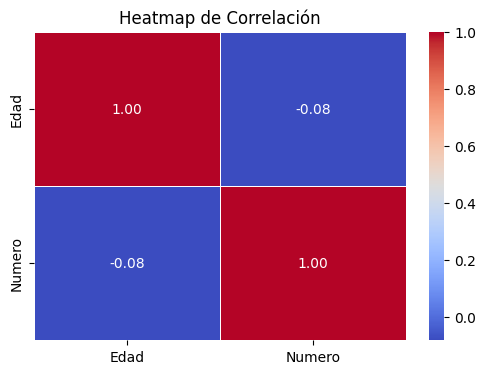

In [69]:
# Heatmap de Correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()